In [ ]:
import pandas as pd

file_path = r'../pubchem_data/HTS/AID_1645841_datatable_all.csv'
df = pd.read_csv(file_path, header=0, skiprows=[1, 2, 3, 4, 5])

print("--- DataFrame (from file) ---")
print(df.head())

--- DataFrame (from file) ---
   PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID  \
0                   1    104223880     197033.0   
1                   2     11111456    5281670.0   
2                   3     11113977    6604832.0   
3                   4    124879150    5280443.0   
4                   5    124879975        836.0   

                       PUBCHEM_EXT_DATASOURCE_SMILES PUBCHEM_ACTIVITY_OUTCOME  \
0    CC1=CC2=C(C=C1)N(C3=C2CN(CC3)C)CCC4=CN=C(C=C4)C                   Active   
1   C1=CC(=C(C=C1O)O)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O                 Inactive   
2  C[C@H]1[C@@H](C(=O)N[C@H](C(=O)N2CCC[C@@H]2C(=...             Inconclusive   
3         C1=CC(=CC=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O                   Active   
4                       C1=CC(=C(C=C1CC(C(=O)O)N)O)O                   Active   

   PUBCHEM_ACTIVITY_SCORE                               PUBCHEM_ACTIVITY_URL  \
0                      43  http://assay.nih.gov/htsws/rest/display/p450-i...   
1               

C:\Users\WooSomin\AppData\Local\Temp\ipykernel_21716\3399416733.py:4: DtypeWarning: Columns (48,53,60,87,92,99,126,131,138,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0, skiprows=[1, 2, 3, 4, 5])


In [ ]:
df.columns

Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME',
       'PUBCHEM_ACTIVITY_SCORE', 'PUBCHEM_ACTIVITY_URL',
       'PUBCHEM_ASSAYDATA_COMMENT', 'Phenotype-Replicate_1',
       'Potency-Replicate_1',
       ...
       'Activity at 0.910 uM-Replicate_5', 'Activity at 1.182 uM-Replicate_5',
       'Activity at 2.302 uM-Replicate_5', 'Activity at 4.834 uM-Replicate_5',
       'Activity at 11.49 uM-Replicate_5', 'Activity at 23.94 uM-Replicate_5',
       'Activity at 57.45 uM-Replicate_5', 'Activity at 115.4 uM-Replicate_5',
       'Activity at 193.5 uM-Replicate_5', 'Activity at 288.3 uM-Replicate_5'],
      dtype='object', length=204)

In [ ]:
df_sel = df[['PUBCHEM_EXT_DATASOURCE_SMILES', 'Activity at 11.49 uM-Replicate_1']]
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PUBCHEM_EXT_DATASOURCE_SMILES     5239 non-null   object 
 1   Activity at 11.49 uM-Replicate_1  5004 non-null   float64
dtypes: float64(1), object(1)
memory usage: 82.0+ KB


In [ ]:
df_sel.isnull().sum()

PUBCHEM_EXT_DATASOURCE_SMILES         3
Activity at 11.49 uM-Replicate_1    238
dtype: int64

In [ ]:
df_sel = df_sel.dropna()
df_sel.isnull().sum()

PUBCHEM_EXT_DATASOURCE_SMILES       0
Activity at 11.49 uM-Replicate_1    0
dtype: int64

In [ ]:
# 양수인 행 삭제 (또는 0 이상인 값 삭제)
df_sel = df_sel[df_sel['Activity at 11.49 uM-Replicate_1'] < 0]

In [ ]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3292 entries, 0 to 5239
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PUBCHEM_EXT_DATASOURCE_SMILES     3292 non-null   object 
 1   Activity at 11.49 uM-Replicate_1  3292 non-null   float64
dtypes: float64(1), object(1)
memory usage: 77.2+ KB


In [ ]:
import pandas as pd
from rdkit import Chem
import io

def smiles_to_canonical(smiles_str):
    try:
        mol = Chem.MolFromSmiles(smiles_str)
        if mol is not None:
            return Chem.MolToSmiles(mol)
        return None
    except:
        return None

df_sel['Canonical_Smiles'] = df_sel['PUBCHEM_EXT_DATASOURCE_SMILES'].apply(smiles_to_canonical)

In [ ]:
df_sel.rename(columns={'Activity at 11.49 uM-Replicate_1': 'Inhibition'}, inplace=True)

# Inhibition 값이 100을 초과하는 경우 100으로 설정
df_sel['Inhibition'] = df_sel['Inhibition'].apply(lambda x: min(x, 100))

df_pre = df_sel.copy()

In [ ]:
df_pre = df_pre[['Canonical_Smiles', 'Inhibition']]
df_pre

,Canonical_Smiles,Inhibition
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,-54.3038
1,O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O)cc(O)c12,-7.6153
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,-96.4045
4,NC(Cc1ccc(O)c(O)c1)C(=O)O,-59.6171
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,-79.3283
...,...,...
5231,CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...,-130.9290
5232,O=C(Nc1cccc2c(=O)cc(-c3nn[nH]n3)oc12)c1ccc(OCC...,-71.6580
5234,O=c1ccc2ccc(O)c(O)c2o1,-9.0443
5236,CCCCCCCC/C=C\CCCCCCCC(=O)NCc1ccc(O)c(OC)c1,-66.7316


In [ ]:
# 음수 값들을 양수로 변환
df_pre['Inhibition'] = df_pre['Inhibition'].abs()

In [ ]:
df_pre['Inhibition'] = df_pre['Inhibition'].apply(lambda x: min(x, 100))

In [ ]:
print("\n--- df_pre after transformations ---")
df_pre.info()
print("\n", df_pre.head())


--- df_pre after transformations ---
<class 'pandas.core.frame.DataFrame'>
Index: 3292 entries, 0 to 5239
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Canonical_Smiles  3292 non-null   object 
 1   Inhibition        3292 non-null   float64
dtypes: float64(1), object(1)
memory usage: 77.2+ KB

                            Canonical_Smiles  Inhibition
0  Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1     54.3038
1  O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O)cc(O)c12      7.6153
3      O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12     96.4045
4                 NC(Cc1ccc(O)c(O)c1)C(=O)O     59.6171
6    CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3     79.3283


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

--- 'Inhibition' 컬럼의 기술 통계량 ---
count    3292.000000
mean       44.817186
std        35.201894
min         0.005100
25%         8.689725
50%        42.201200
75%        78.168850
max       100.000000
Name: Inhibition, dtype: float64


정제된 데이터가 'C:\Users\WooSomin\Desktop\AI신약개발\데이콘\processed_data\aid_1645841_cyp3a4.csv'으로 저장되었습니다.


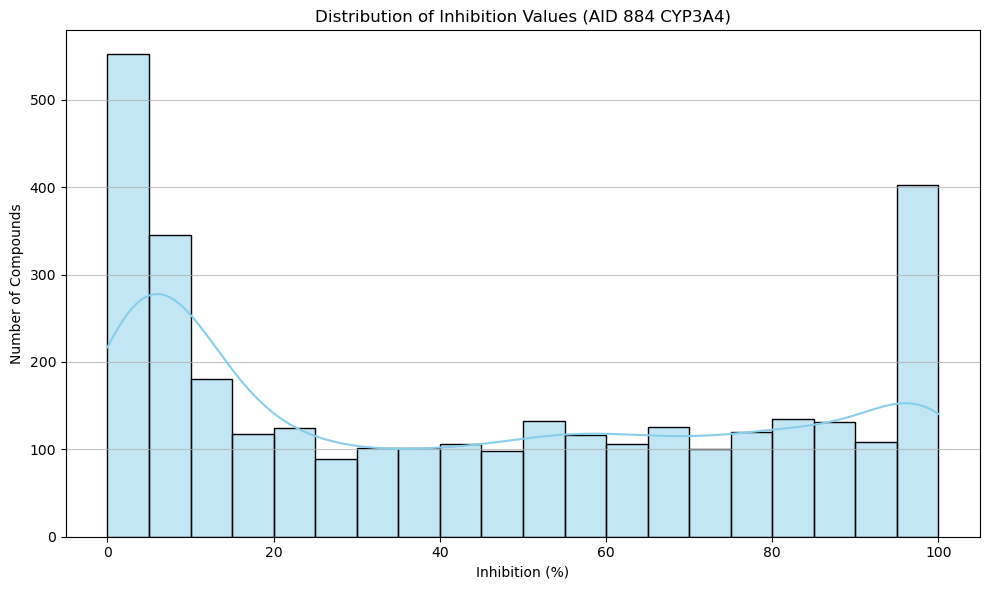

In [ ]:
print("--- 'Inhibition' 컬럼의 기술 통계량 ---")
print(df_pre['Inhibition'].describe())
print("\n")

plt.figure(figsize=(10, 6))
sns.histplot(df_pre['Inhibition'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Inhibition Values (AID 16485841 CYP3A4)')
plt.xlabel('Inhibition (%)')
plt.ylabel('Number of Compounds')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

output_csv_file_name = r'../processed_data/aid_1645841_cyp3a4.csv'
df_pre.to_csv(output_csv_file_name, index=False)

print(f"정제된 데이터가 '{output_csv_file_name}'으로 저장되었습니다.")